# **Zomato Data Analysis Using Python**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_frame = pd.read_csv('/content/Zomato-data-.csv')
data_frame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
def handleRate(value):
  value = str(value).split("/")
  value = value[0]
  return float(value)

data_frame['rate'] = data_frame['rate'].apply(handleRate)
print(data_frame.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of resturant')

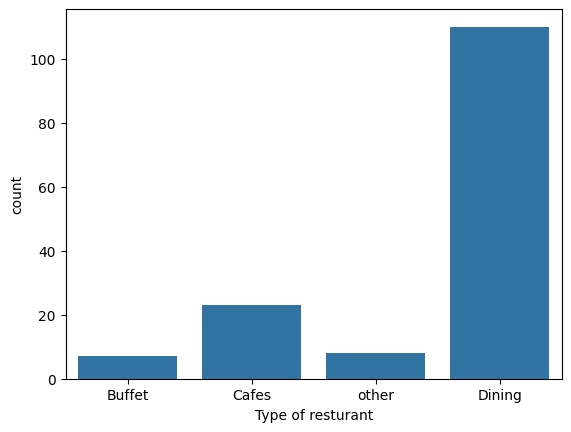

In [ ]:
sns.countplot(x=data_frame['listed_in(type)'])
plt.xlabel("Type of resturant")

Text(0, 0.5, 'Votes')

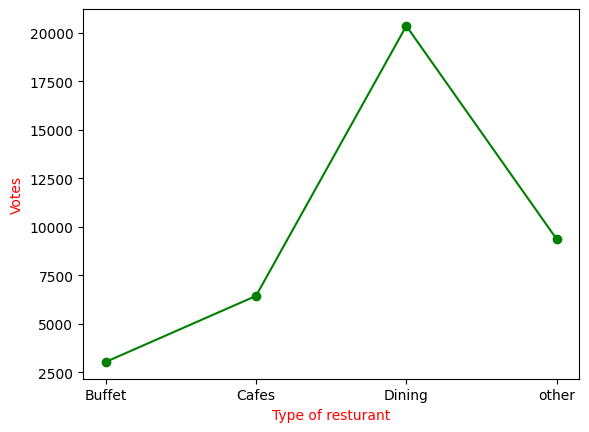

In [ ]:
grouped_data = data_frame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of resturant', c='red', size=10)
plt.ylabel('Votes', c='red', size=10)

In [ ]:
max_votes = data_frame['votes'].max()
rest_max_votes = data_frame.loc[data_frame['votes'] == max_votes, 'name']

print('Resturant with max names votes:', rest_max_votes)

Resturant with max names votes: 38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

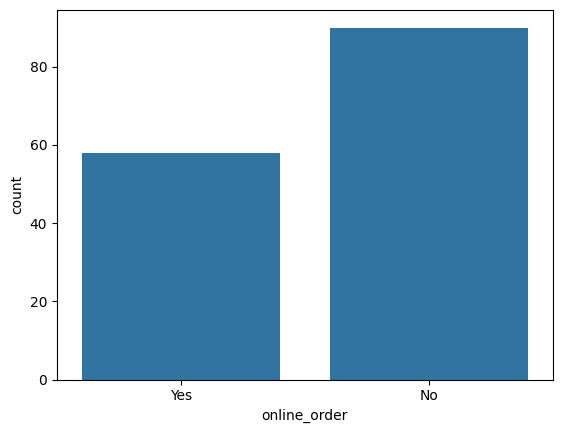

In [ ]:
sns.countplot(x=data_frame['online_order'])

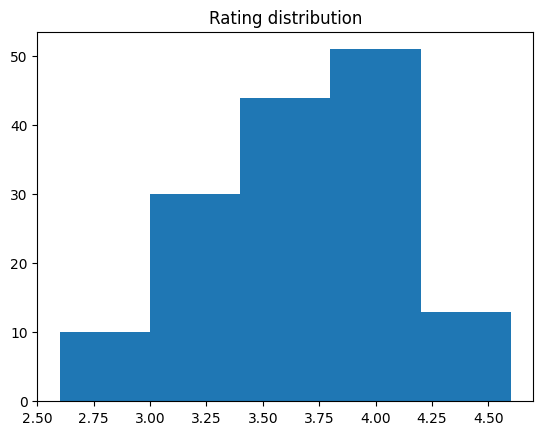

In [ ]:
plt.hist(data_frame['rate'], bins=5)
plt.title('Rating distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

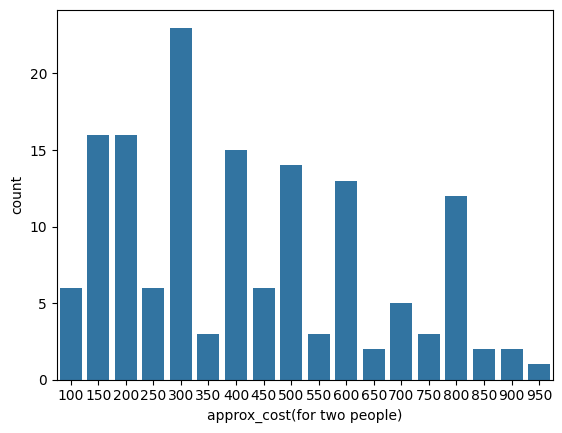

In [ ]:
couple_data=data_frame['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

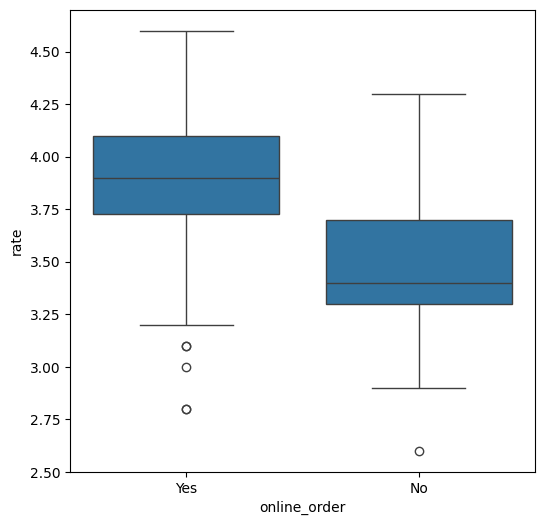

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = data_frame)

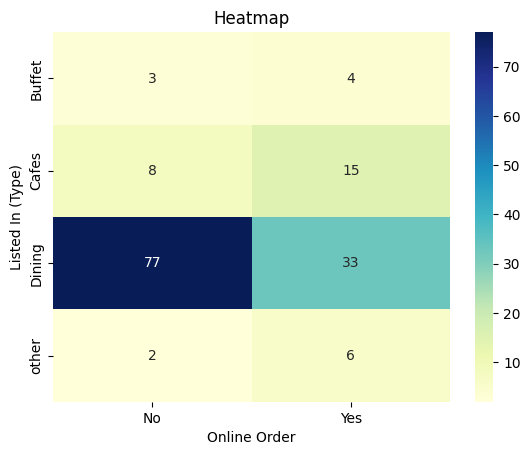

In [ ]:
pivot_table = data_frame.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()